<a href="https://colab.research.google.com/github/AbdelRahmanRifai87/Mask-Detection-Model/blob/main/ML_Project_7_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mask Detection

© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this project is to build a model that can detect whether a person is wearing a mask or not. You would be downloading the data from kaggle and then building you model while we guide you through the steps.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset What you will have to do, is to search for a way that allows you to download the dataset from kaggle directly into google colab (or your google drive). This process would save you the trouble from downloading the dataset locally and then uploading it to use it in colab.

In [ ]:
#Do your Research
#Test Your Zaka
!pip install -q kaggle
from google.colab import files

files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it. Here you have the option of unzipping it in the environment or in your google drive.

In [ ]:
#Test Your Zaka
!kaggle datasets download omkargurav/face-mask-dataset
!unzip -q face-mask-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:00<00:00, 134MB/s]
100% 163M/163M [00:01<00:00, 157MB/s]


##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** and the **shutil** libraries that would help you creating folders, and moving images from a folder to another. In simple terms, the libraries helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
#Test Your Zaka --- Create the Train, Validation and Testing Folder
os.mkdir("data/Train")
os.mkdir("data/Validation")
os.mkdir("data/Test")

In [ ]:
#Test Your Zaka --- Create the classes folders inside of each folder you created above
os.mkdir("data/Train/with_mask")
os.mkdir("data/Train/without_mask")
os.mkdir("data/Validation/with_mask")
os.mkdir("data/Validation/without_mask")
os.mkdir("data/Test/with_mask")
os.mkdir("data/Test/without_mask")

In [ ]:
#Test Your Zaka --- For each class, take the images, and select 500 samples for training and 100 for evaluation, and 50 for testing
# Define source and destination paths
source_base = "data"
destination_base = "data"
classes = ["with_mask", "without_mask"]

# Number of samples for each split
train_samples = 500
validation_samples = 100
test_samples = 50

# Process each class
for class_name in classes:
    source_folder = os.path.join(source_base, class_name)
    train_folder = os.path.join(destination_base, "Train", class_name)
    validation_folder = os.path.join(destination_base, "Validation", class_name)
    test_folder = os.path.join(destination_base, "Test", class_name)

    # Create destination directories if they don't exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(validation_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Get all images from the source folder
    images = [f for f in os.listdir(source_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif'))]
    random.shuffle(images)  # Shuffle to ensure randomness

    # Ensure enough images exist
    if len(images) < train_samples + validation_samples + test_samples:
        print(f"Not enough images in class '{class_name}' for the required splits. Skipping.")
        continue

    # Select images for each split
    train_images = images[:train_samples]
    validation_images = images[train_samples:train_samples + validation_samples]
    test_images = images[train_samples + validation_samples:train_samples + validation_samples + test_samples]

    # Move images to respective folders
    for image in train_images:
        shutil.move(os.path.join(source_folder, image), os.path.join(train_folder, image))
    for image in validation_images:
        shutil.move(os.path.join(source_folder, image), os.path.join(validation_folder, image))
    for image in test_images:
        shutil.move(os.path.join(source_folder, image), os.path.join(test_folder, image))

    print(f"Processed class '{class_name}': {train_samples} to Train, {validation_samples} to Validation, {test_samples} to Testing.")

print("Dataset organization complete!")

Processed class 'with_mask': 500 to Train, 100 to Validation, 50 to Testing.
Processed class 'without_mask': 500 to Train, 100 to Validation, 50 to Testing.
Dataset organization complete!


##Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
#Test Your Zaka
training_path = "data/Train"
validation_path = "data/Validation"
testing_path = "data/Test"

To make sure that everythinh went correctly, write a code that counts the number of images that you have in your training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
#Test Your Zaka
with_mask_count = len(os.listdir(os.path.join(training_path, "with_mask")))
without_mask_count = len(os.listdir(os.path.join(training_path, "without_mask")))
print(f"Number of images with 'with_mask': {with_mask_count}")
print(f"Number of images with 'without_mask': {without_mask_count}")

Number of images with 'with_mask': 500
Number of images with 'without_mask': 500


Do the same for the validation and the testing folders

In [ ]:
#Test Your Zaka
with_mask_count = len(os.listdir(os.path.join(validation_path, "with_mask")))
without_mask_count = len(os.listdir(os.path.join(validation_path, "without_mask")))
print(f"Number of images with 'with_mask': {with_mask_count}")
print(f"Number of images with 'without_mask': {without_mask_count}")

Number of images with 'with_mask': 100
Number of images with 'without_mask': 100


In [ ]:
#Test Your Zaka
with_mask_count = len(os.listdir(os.path.join(testing_path, "with_mask")))
without_mask_count = len(os.listdir(os.path.join(testing_path, "without_mask")))
print(f"Number of images with 'with_mask': {with_mask_count}")
print(f"Number of images with 'without_mask': {without_mask_count}")

Number of images with 'with_mask': 50
Number of images with 'without_mask': 50


Write a code that shows 5 random images for people with mask from your training set.

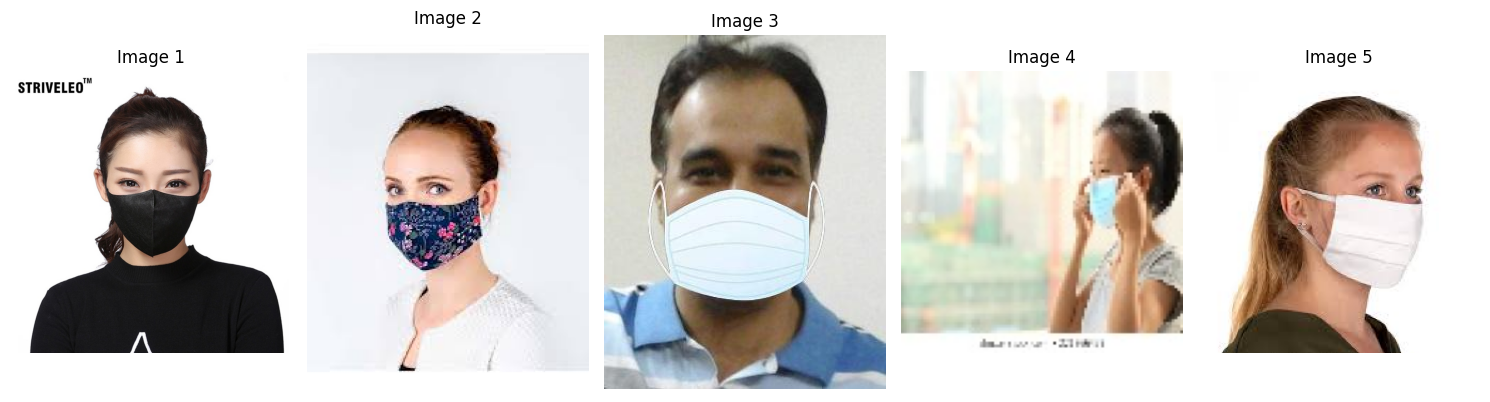

In [ ]:
#Test Your Zaka
# Define the path for the 'with_mask' category in the training set
with_mask_path = "data/Train/with_mask"

# Get all image files in the 'with_mask' folder
images = [f for f in os.listdir(with_mask_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif'))]

# Select 5 random images
random_images = random.sample(images, 5)

# Display the images
plt.figure(figsize=(15, 10))
for i, image_name in enumerate(random_images):
    image_path = os.path.join(with_mask_path, image_name)  # Full path to the image
    img = mpimg.imread(image_path)  # Read the image

    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(img)
    plt.axis("off")  # Turn off axis
    plt.title(f"Image {i + 1}")  # Add a title

plt.tight_layout()
plt.show()

Do the same for people without mask.

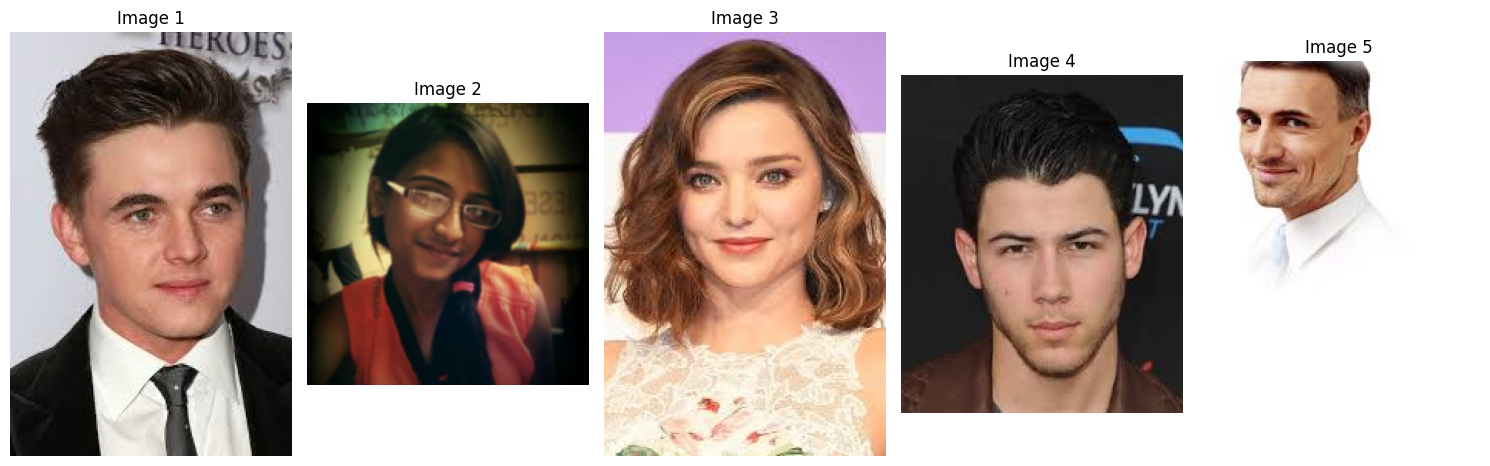

In [ ]:
#Test Your Zaka

##Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Input shape matches resized images
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the features into a 1D vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(2, activation='softmax'))  # 2 classes: with_mask and without_mask

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use this for multi-class classification
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model that you defined on the training data and evaluate it on the validation data. Feel free to tune the hyperparameters of your model until you reach a satisfying result on the validation set. </br>
**N.B:** Make sure to save the model training history in a variable to plot later the learning curve.

In [ ]:
#Test Your Zaka
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    'data/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'data/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
 #Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

# Save the training history for plotting
history_dict = history.history

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5869 - loss: 0.8323 - val_accuracy: 0.8350 - val_loss: 0.4045
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7642 - loss: 0.5304 - val_accuracy: 0.8900 - val_loss: 0.3811
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8130 - loss: 0.4421 - val_accuracy: 0.8900 - val_loss: 0.3002
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8189 - loss: 0.4200 - val_accuracy: 0.8850 - val_loss: 0.3043
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8145 - loss: 0.4301 - val_accuracy: 0.8850 - val_loss: 0.2824
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20


Plot the accuracy curve and see if your model is overfit.

In [ ]:
#Test Your Zaka
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



[Share your Zaka]

##Evaluate the model


Now you will evaluate the model that you built on the testing set that you kept aside since the beginning.

In [ ]:
#Test Your Zaka
# Define the testing data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create the testing data generator
test_generator = test_datagen.flow_from_directory(
    'data/Test',             # Path to the Testing directory
    target_size=(128, 128),     # Match the input size used during training
    batch_size=32,              # Batch size for evaluation
    class_mode='categorical',   # Two classes: with_mask, without_mask
    shuffle=False               # Keep images in order for consistent results
)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_accuracy}")

Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

In [ ]:
#Test Your Zaka
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generate predictions on the test set
test_generator.reset()  # Ensure the generator starts from the beginning
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices
true_classes = test_generator.classes  # True class labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

**What did you learn about your model from this confusion matrix?**

[Share Your Zaka]The confusion matrix shows:

Correct Predictions: 44 with_mask and 42 without_mask.
Misclassifications: 6 with_mask misclassified as without_mask and 8 without_mask misclassified as with_mask.
Performance: The model performs slightly better on with_mask but struggles more with without_mask predictions.
Overall Accuracy: The classifier is effective, achieving 86% accuracy.

##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

In [ ]:
#Test Your Zaka
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the testing data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    'data/Test',
    target_size=(128, 128),
    batch_size=1,  # Set batch size to 1 for per-image analysis
    class_mode='categorical',
    shuffle=False  # Keep order for analysis
)

# Predict on the test set
test_generator.reset()  # Ensure predictions align with the dataset order
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # True class labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Create a DataFrame for analysis
results = pd.DataFrame({
    "Filename": test_generator.filenames,
    "True Label": [class_labels[i] for i in true_classes],
    "Predicted Label": [class_labels[i] for i in predicted_classes],
    "Correct": np.array(true_classes) == np.array(predicted_classes)  # Correctness
})

# Display the first few rows of the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Testing Set Predictions and Analysis", dataframe=results)

# Display a sample of incorrectly classified images
incorrect = results[results["Correct"] == False]

if not incorrect.empty:
    print("\nIncorrect Predictions:")
    for i, row in incorrect.head(5).iterrows():  # Display up to 5 incorrect predictions
        image_path = f"data/Test/{row['Filename']}"
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.title(f"True: {row['True Label']} | Predicted: {row['Predicted Label']}")
        plt.axis("off")
        plt.show()
else:
    print("All images were correctly classified!")

**Try to derive some conclusions from the wrong predictions that your model has made. Meaning: why do you think these predictions were wrong?**

[Share Your Zaka]i think the images had different orientation or zoom so they wasn't clear for the model

**Think of a way that you can use in order to improve the performance of your model, and implement it**

[Share Your Zaka]we can train a model on a dataset and gave it another specific dataset on top of the previous one to make the model more accurate

**Your Friend took your code and ran it again, but obtained different accuracies on the different sets. How do you interpret this?**

[Share Your Zaka]The variability in accuracies observed across runs is a result of the inherent randomness in the training process, such as weight initialization, data augmentation, shuffling, and stochastic optimization. These differences are expected and typically minor.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(2, activation='softmax')(x)  # 2 classes: with_mask and without_mask

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    'data/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'data/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Train the custom layers
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")